# Encoder-Decoder

* Import the modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

* We consider the vectors obtained by

$$(f_1(t_i),f_2(t_i),f_3(t_i),f_4(t_i),f_5(t_i),f_6(t_i)), \ i > 0$$

In [2]:
def f1(t):
    "f1 function"
    ret = torch.sin(t)
    return ret
def f2(t):
    "f2 function"
    ret = torch.cos(t)
    return ret
def f3(t):
    "f3 function"
    ret = t
    return ret
def f4(t):
    "f4 function"
    ret = f1(t) - f2(t) 
    return ret
def f5(t):
    "f5 function"
    ret = f1(t) - f2(t) + f3(t) 
    return ret
def f6(t):
    "f5 function"
    ret = f1(t) + f2(t) + f3(t) 
    return ret

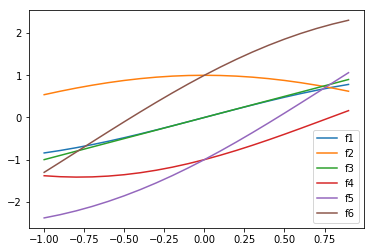

In [3]:
dt = 0.1
t = torch.arange(-1.0, 1.0, dt)
fig, ax = plt.subplots()
ax.plot(t.numpy(),f1(t).numpy(),"-", label="f1")
ax.plot(t.numpy(),f2(t).numpy(), "-", label="f2")
ax.plot(t.numpy(),f3(t).numpy(), "-", label="f3")
ax.plot(t.numpy(),f4(t).numpy(), "-", label="f4")
ax.plot(t.numpy(),f5(t).numpy(), "-", label="f5")
ax.plot(t.numpy(),f6(t).numpy(), "-", label="f6")
ax.legend();

* Create Pytoch Dataset handler:

In [4]:
class vec2vecDataset(Dataset):
    """ vec2vec dataset."""
    
    def __init__(self, h_size):
        
        # Generate the data
        tt = torch.arange(-1.0, 1.0, h_size)  
        lentt = tt.shape[0]        
        T1 = f1(tt).view([1,lentt])
        T2 = f2(tt).view([1,lentt])
        T3 = f3(tt).view([1,lentt])
        T4 = f4(tt).view([1,lentt])
        T5 = f5(tt).view([1,lentt])
        T6 = f6(tt).view([1,lentt])
        self.X = torch.cat((T1, T2, T3, T4, T5, T6), 0)
        self.Y = self.X 
        self.len = self.X.shape[1]
                
    def __getitem__(self, index):
        return self.X[:,index], self.Y[:,index]

    def __len__(self):
        return self.len

* Inspect the Dataset:

In [5]:
dataset = vec2vecDataset(0.05)
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=1)

i : 0
len(data) : 2,  data[0].shape : torch.Size([32, 6]), data[1].shape : torch.Size([32, 6])
X.shape : torch.Size([32, 6]), y.shape : torch.Size([32, 6])


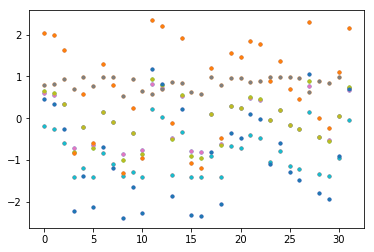

In [6]:
for i, data in enumerate(train_loader, 0):
 
    print(f'i : {i}')
    print('len(data) : {},  data[0].shape : {}, data[1].shape : {}'.format(len(data), data[0].shape, data[1].shape))
    # Get the inputs
    X, y = data
    
    fig, ax = plt.subplots()
    ax.plot(X[:,:].numpy(),".", label="data")
    ax.plot(y[:,:].numpy(), ".", label="pred")
    
    print('X.shape : {}, y.shape : {}'.format(X.shape, y.shape))
    
    if i == 0:
        break

* Simple encoder-decoder architecture:

In [7]:
class Autoencoder(nn.Module):
    
    def __init__(self, input_dim):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 10),
            nn.Tanh(),
            nn.Linear(10, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 10),
            nn.Tanh(),
            nn.Linear(10, input_dim),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [8]:
# Initialitation
def init_weights(self):
    for idx, m in enumerate(self.modules()):         
        if idx > 0:
            print('{} -> {}'.format(idx,m))
            if type(m) in [nn.Linear]:
                for name, param in m.named_parameters():
                    print(f'Initialization of {name}', end="", flush=True)
                    if 'weight' in name:   
                        torch.nn.init.xavier_uniform_(param.data)
                        print('...done')
                    elif 'bias' in name:
                        param.data.fill_(0)
                        print('...done') 

* Setup the training process: Model + Loss + Optimizer

In [9]:
# Data parameters
h_size = 0.001

# Global parameters
input_dim = 6      # input dimension

# Dataset
dataset = vec2vecDataset(h_size)
# Dataloader
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=1)

# Model
model = Autoencoder(input_dim)

# Initialization     
print('model.modules() : {}\n'.format(model.modules()))
i = 0
for m in model.modules():
    print('i : {}'.format(i,))
    print('m : {} \ntype(m) : {}'.format(m, type(m)))
    print('m.named_parameters() :')
    for name, param in m.named_parameters():
        print('  name : {}'.format(name))
        print('  param.shape : {}'.format(param.shape))  
    i = i + 1
    print('\n')    
    
# Initialization         
model.apply(init_weights)

# Criterion
criterion = nn.MSELoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

model.modules() : <generator object Module.modules at 0x11f5c3390>

i : 0
m : Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=6, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=6, bias=True)
  )
) 
type(m) : <class '__main__.Autoencoder'>
m.named_parameters() :
  name : encoder.0.weight
  param.shape : torch.Size([10, 6])
  name : encoder.0.bias
  param.shape : torch.Size([10])
  name : encoder.2.weight
  param.shape : torch.Size([2, 10])
  name : encoder.2.bias
  param.shape : torch.Size([2])
  name : decoder.0.weight
  param.shape : torch.Size([10, 2])
  name : decoder.0.bias
  param.shape : torch.Size([10])
  name : decoder.2.weight
  param.shape : torch.Size([6, 10])
  name : decoder.2.bias
  param.shape : torch.Size([6])


i : 1
m : Sequential(
  (0): Linear(in_f

* Training:

In [10]:
num_epochs = 500

for epoch in range(num_epochs):
    
    for i, data in enumerate(train_loader, 0):
 
        # Get the inputs
        X, y = data

        # Train step
        model.train()
        optimizer.zero_grad()

        y_ = model(X)
        loss = criterion(y_, y)

        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            if i % 16 == 0:        
                # Evaluation
                model.eval()
                with torch.no_grad():
                    y_ = model(X)

                # Compute and print loss
                loss = criterion(y_, y)
                print(f'Epoch : {epoch}, Iteration : {i}, Loss : {loss.item()}')

Epoch : 0, Iteration : 0, Loss : 0.844441294670105
Epoch : 0, Iteration : 16, Loss : 0.8225052356719971
Epoch : 0, Iteration : 32, Loss : 0.591867983341217
Epoch : 0, Iteration : 48, Loss : 0.41090717911720276
Epoch : 100, Iteration : 0, Loss : 1.2369651813060045e-05
Epoch : 100, Iteration : 16, Loss : 8.985519343696069e-06
Epoch : 100, Iteration : 32, Loss : 7.280765203176998e-06
Epoch : 100, Iteration : 48, Loss : 9.46605814533541e-06
Epoch : 200, Iteration : 0, Loss : 2.082515266010887e-06
Epoch : 200, Iteration : 16, Loss : 1.476893771723553e-06
Epoch : 200, Iteration : 32, Loss : 1.1156015489177662e-06
Epoch : 200, Iteration : 48, Loss : 1.4017100511409808e-06
Epoch : 300, Iteration : 0, Loss : 6.292498255788814e-07
Epoch : 300, Iteration : 16, Loss : 8.502381092512223e-07
Epoch : 300, Iteration : 32, Loss : 4.4917285890733183e-07
Epoch : 300, Iteration : 48, Loss : 7.406925988107105e-07
Epoch : 400, Iteration : 0, Loss : 3.362945335538825e-07
Epoch : 400, Iteration : 16, Loss : 6

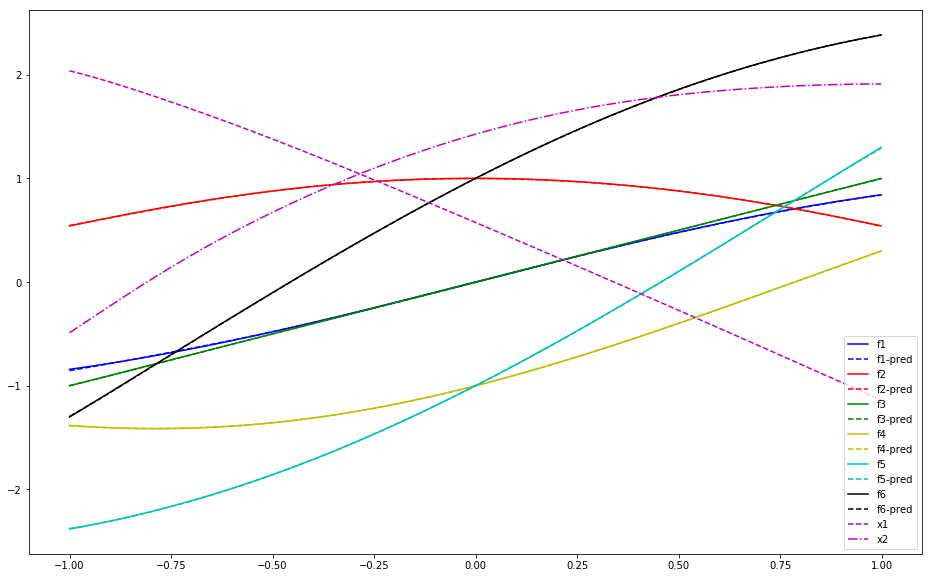

In [100]:
with torch.no_grad():
    tt = torch.arange(-1.0, 1.0, h_size)
    for i, t in enumerate(tt):
        x = torch.tensor([f1(t),f2(t),f3(t),f4(t),f5(t),f6(t)])
        x_enc = model.encoder(x)
        y = model(x)
        x_enc = x_enc.view(1,-1)
        y = y.view(1,-1)
        if i == 0:
            xt_enc = x_enc
            yt = y
        else:
            xt_enc = torch.cat((xt_enc, x_enc), 0)
            yt = torch.cat((yt, y), 0)

    dt = 0.001
    t = torch.arange(-1.0, 1.0, dt)  
    plt.figure(figsize = (16, 10))
    plt.plot(tt.numpy(),f1(tt).numpy(),"-b", label="f1")
    plt.plot(tt.numpy(),yt[:,0].numpy(),"--b", label="f1-pred")
    plt.plot(tt.numpy(),f2(tt).numpy(), "-r", label="f2")
    plt.plot(tt.numpy(),yt[:,1].numpy(),"--r", label="f2-pred")
    plt.plot(tt.numpy(),f3(tt).numpy(), "-g", label="f3")
    plt.plot(tt.numpy(),yt[:,2].numpy(),"--g", label="f3-pred")
    plt.plot(tt.numpy(),f4(tt).numpy(), "-y", label="f4")
    plt.plot(tt.numpy(),yt[:,3].numpy(),"--y", label="f4-pred")
    plt.plot(tt.numpy(),f5(tt).numpy(), "-c", label="f5")
    plt.plot(tt.numpy(),yt[:,4].numpy(),"--c", label="f5-pred")
    plt.plot(tt.numpy(),f6(tt).numpy(), "-k", label="f6")
    plt.plot(tt.numpy(),yt[:,5].numpy(),"--k", label="f6-pred")
    plt.plot(tt.numpy(),xt_enc[:,0].numpy(),"--m", label="x1")
    plt.plot(tt.numpy(),xt_enc[:,1].numpy(),"-.m", label="x2")
    plt.legend();            